This notebook is meant to help recording and organizing the work toward a clean bias-variance curve

### Workflow

1. Simulation
2. Analyis
3. Observations
4. Debugging
5. Fixes and Parameter Tuning
6. Repeat


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ring_attractor import RingAttractor

# Batch 3

### 1. Simulation

>   "neurons_n": 256,  
    "simulation_time": 10000,  
    "iterations": 30,  
    "noise_levels": 80,  
    "noise_low": 0.0,  
    "noise_high": 8e-4,  
    "weights": [0.050, 0.100, 0.050, 0.250],  
    "fixed_points": [0, 1, 2, 4, 8, 16, 32]



In [2]:
df = pd.read_csv('backups/batch_3/means.csv', index_col=0)
df

,0.00e+00,1.01e-05,2.03e-05,3.04e-05,4.05e-05,5.06e-05,6.08e-05,7.09e-05,8.10e-05,9.11e-05,...,7.09e-04,7.19e-04,7.29e-04,7.39e-04,7.49e-04,7.59e-04,7.70e-04,7.80e-04,7.90e-04,8.00e-04
0,0.000200,0.000200,0.000200,0.000200,0.00020,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.000490,0.000628,0.000569,0.000727,0.000743,0.000647,0.000705,0.000593,0.000664,0.000722
1,0.000200,0.000200,0.000200,0.000200,0.00020,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.000490,0.000628,0.000569,0.000727,0.000743,0.000647,0.000705,0.000593,0.000664,0.000722
2,0.000200,0.000200,0.000200,0.000200,0.00020,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.000490,0.000628,0.000569,0.000727,0.000743,0.000647,0.000705,0.000593,0.000664,0.000722
4,0.000200,0.000200,0.000200,0.000200,0.00020,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.000490,0.000686,0.000592,0.000788,0.000775,0.000631,0.000736,0.000596,0.000672,0.000745
8,0.000200,0.000200,0.000200,0.000200,0.00020,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.000515,0.000609,0.000610,0.000590,0.000646,0.000581,0.000577,0.000555,0.000624,0.000658
16,0.000200,0.000200,0.000200,0.000200,0.00020,0.000200,0.000200,0.000200,0.000200,0.000200,...,0.000554,0.000594,0.000528,0.000538,0.000558,0.000533,0.000534,0.000555,0.000536,0.000546
32,0.000226,0.000226,0.000226,0.000224,0.00022,0.000218,0.000218,0.000218,0.000218,0.000218,...,0.000217,0.000218,0.000218,0.000217,0.000217,0.000217,0.000216,0.000217,0.000217,0.000217


### 2. Analysis

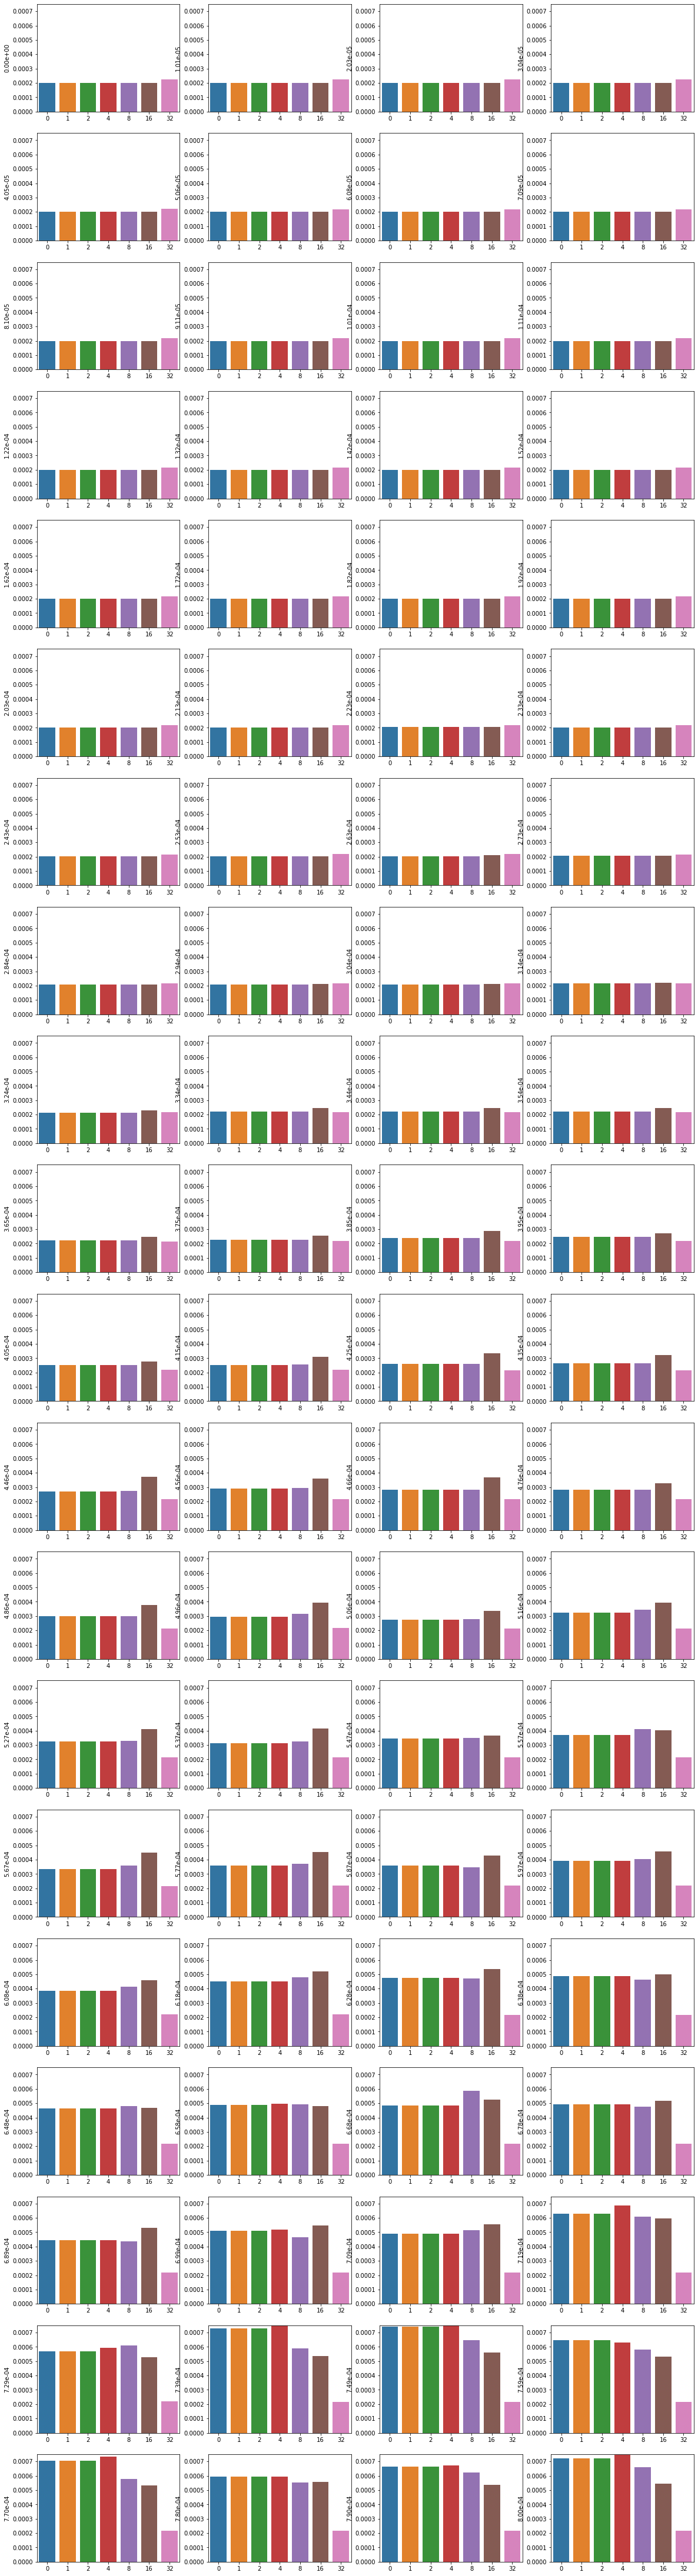

In [3]:
_, axes = plt.subplots(20, 4, figsize=(20, 80))
c, r = 0, 0

for col in df.columns:
    axes[c, r].set_ylim(0, 0.00075)
    # Scale is fixed now
    sns.barplot(x=df.index, y=col, data=df, ax=axes[c, r])

    
    r += 1
    if r > 3:
        c+=1
        r=0

In [4]:
seeds = os.listdir("backups/batch_3/")
seeds.remove('means.csv')
seeds_df = [pd.read_csv(f"backups/batch_3/{i}", index_col=0) for i in seeds]

grouped_seeds = pd.concat(seeds_df)
grouped_seeds.columns = [float(i) for i in grouped_seeds.columns.values]
fp_by_error = [grouped_seeds.loc[i] for i in df.index]

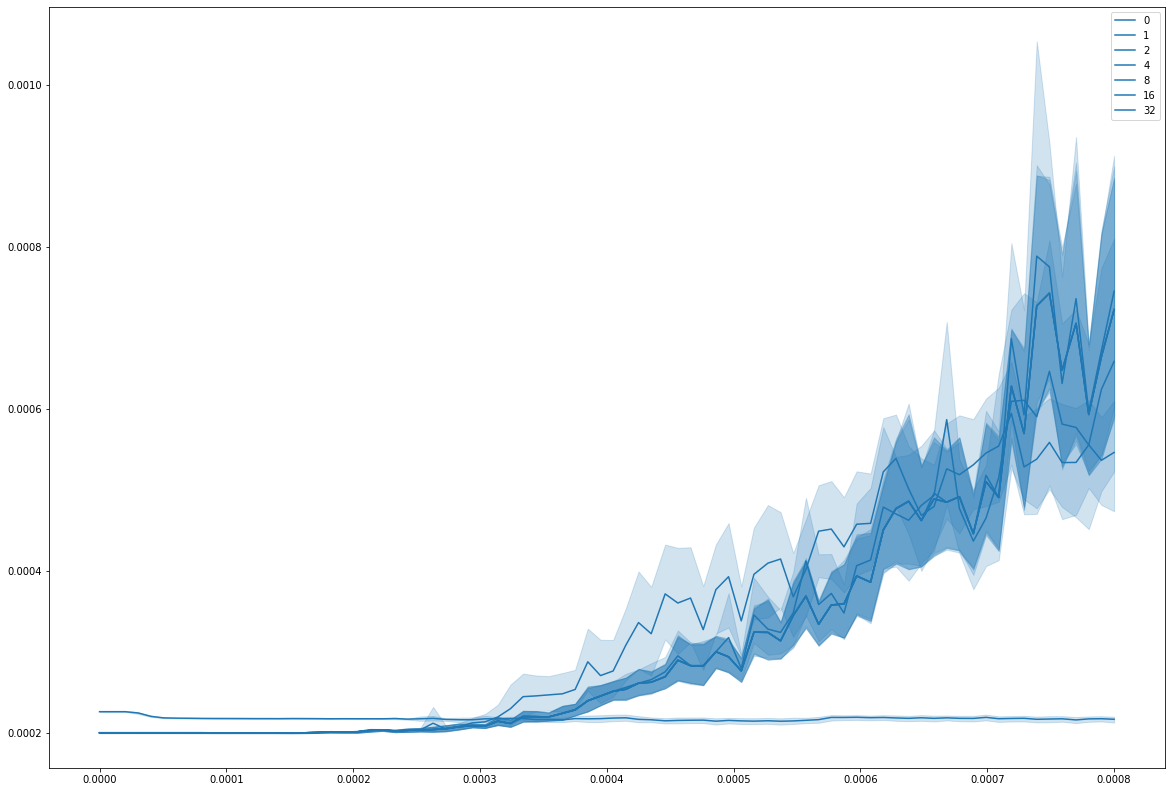

In [5]:
fig = plt.figure(figsize=(20,14))
for i, data in enumerate(fp_by_error):

    sns.lineplot(data=data.transpose())

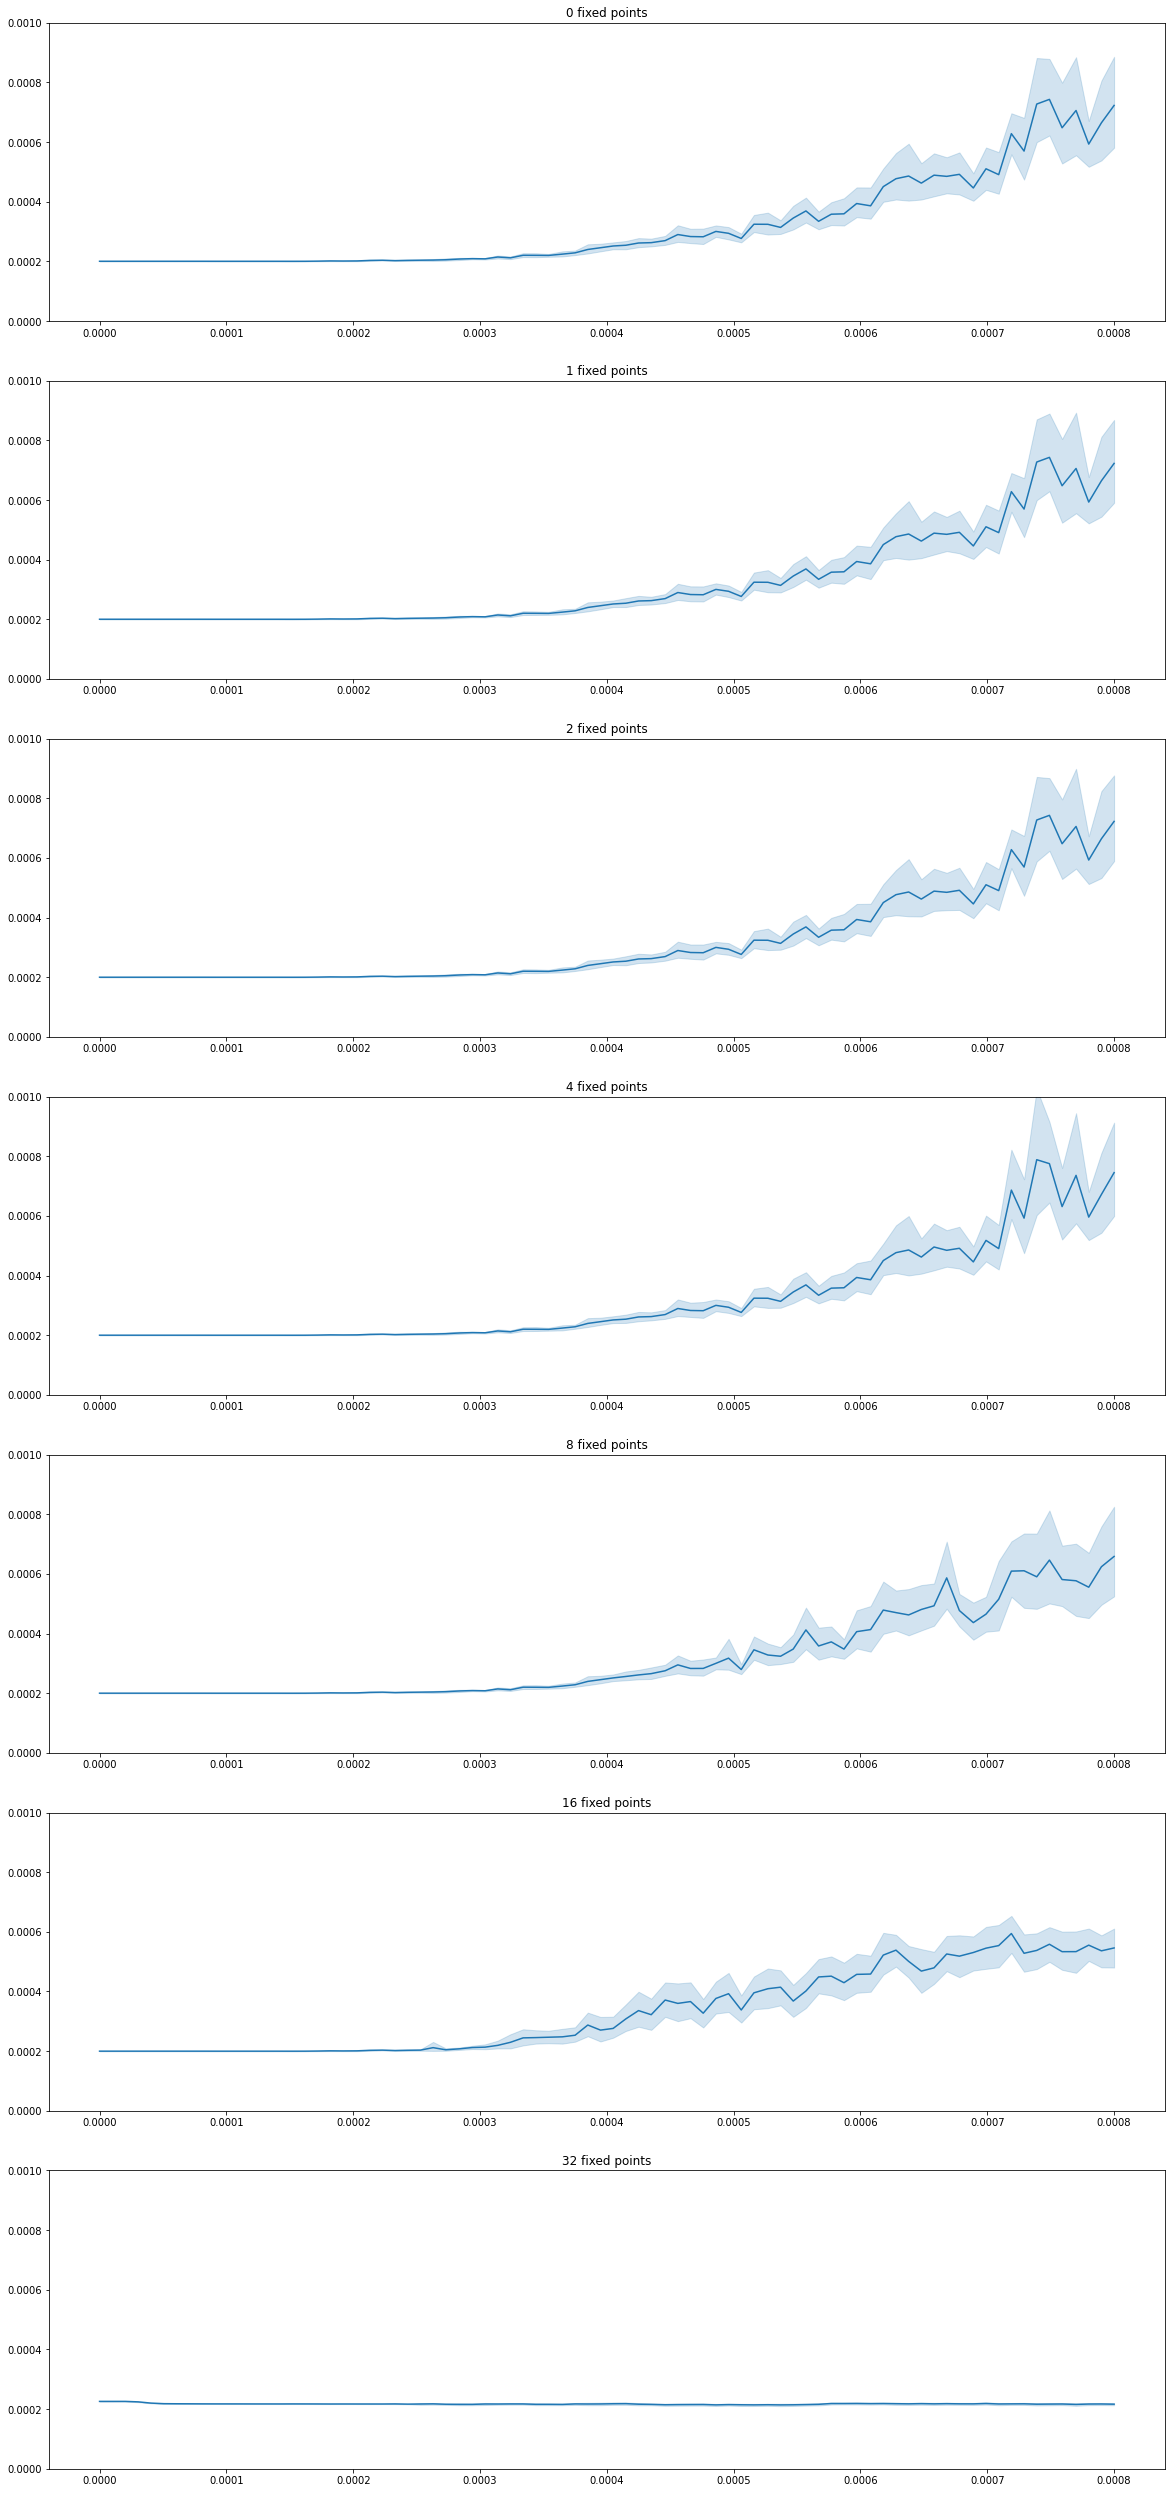

In [6]:
_, axes = plt.subplots(7, 1, figsize=(20, 45))

for i, k in enumerate([0,1,2,4,8,16,32]):
    axes[i].set_title(f"{k} fixed points")
    axes[i].set_ylim(0,.001)

    sns.lineplot(data=fp_by_error[i].transpose(), ax=axes[i], legend=False, color='b')


### 3. Observations

    a. We observe that from the beginning the error of n_fp=32 is constant, and at the beginning it's the highest.
    We then observe that at 3.24e-04 also n_fp=16 starts to rise, and it is possible that it is because he sometimes hits the fixed point. Now, what happens is that the fp drags the bump farther away from the beginning, causing an increase in the error. The error continues to get higher, because it becomes higher the probability to be captured by the fp. But when that probability approaches to 1, the error should become stable (probably at 7.19e-04, maybe also before) and variance should decrease. Also, when probability approaches to 1, other conditions with farther fixed points should have approximately the same error as the n_fp=16 condition
    
    b. We can maybe interpretate the interval between 3.24e-04 and 7.19e-04 as the critical point of the system when n_fp = 16
    
    c. The simulation took a long time (~220h)
    
    
  
    
### 4. Debugging



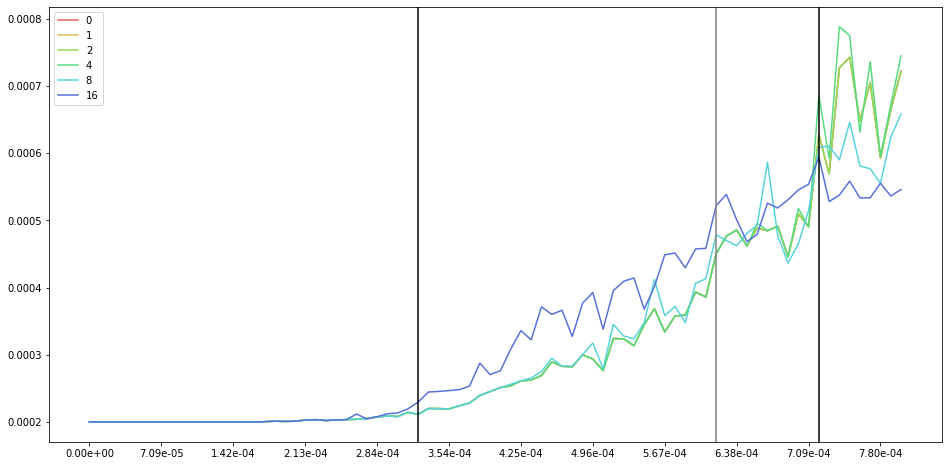

In [7]:
import matplotlib.ticker as plticker

palette = sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize=(16,8))

for i in range(6):
    ax.plot(df.iloc[i], label = (i if i < 3 else 2**(i-1)), color=palette[i], )
ax.legend()
loc = plticker.MultipleLocator(base=7.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

plt.axvline(x="3.24e-04", color='k')
plt.axvline(x="6.18e-04", color='grey')
plt.axvline(x="7.19e-04", color='k')

plt.show()
# You can't see n_fp=0,1 because they're almost identical to n_fp=2, at those levels of noise 
# Because the probability of finding a fixed point when the noise is so low is minimal

In [8]:
import scipy.stats as stats
print(df.iloc[5, :60].var(), df.iloc[5, 60:80].var())
stats.f_oneway(df.iloc[5, :60], df.iloc[5, 60:80])


7.2653635654230085e-09 1.0171553671602526e-09


F_onewayResult(statistic=177.25603874732192, pvalue=8.93213121269015e-22)

#### Difference is significant in variances, and the variance of the last 20 values is many times smaller
I took equal intervals even if they weren't the best ones, we can do this better 
when we simulate on the whole range of noises

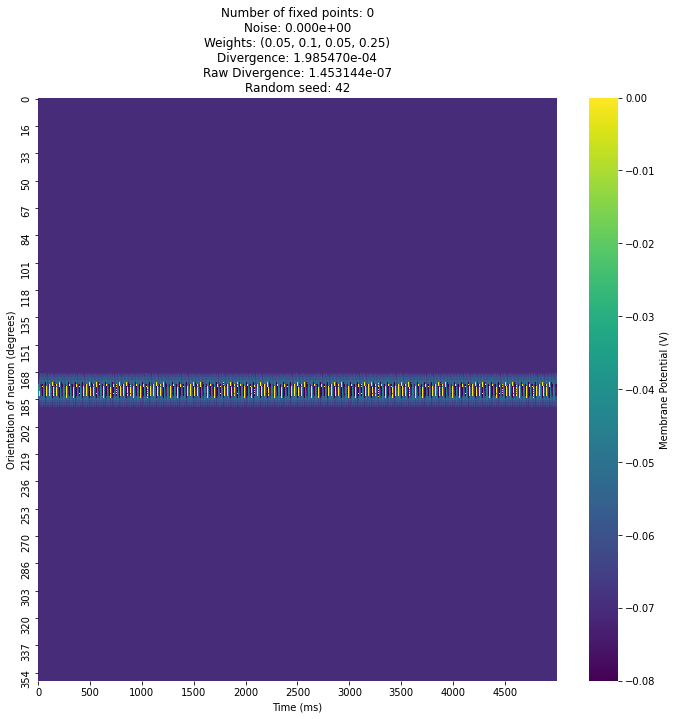

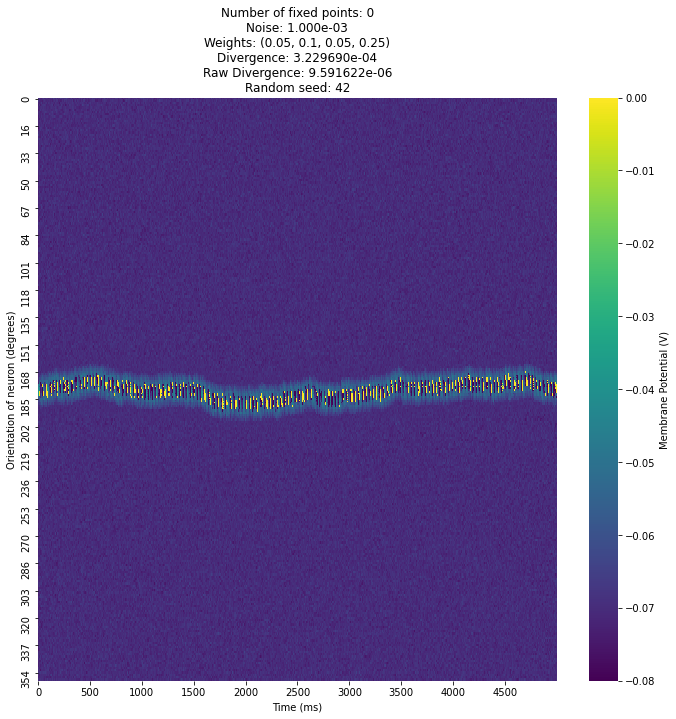

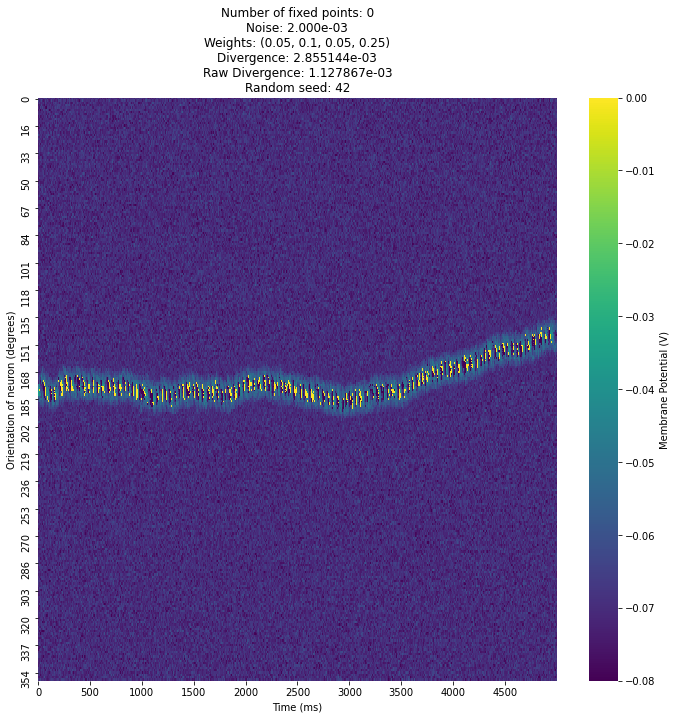

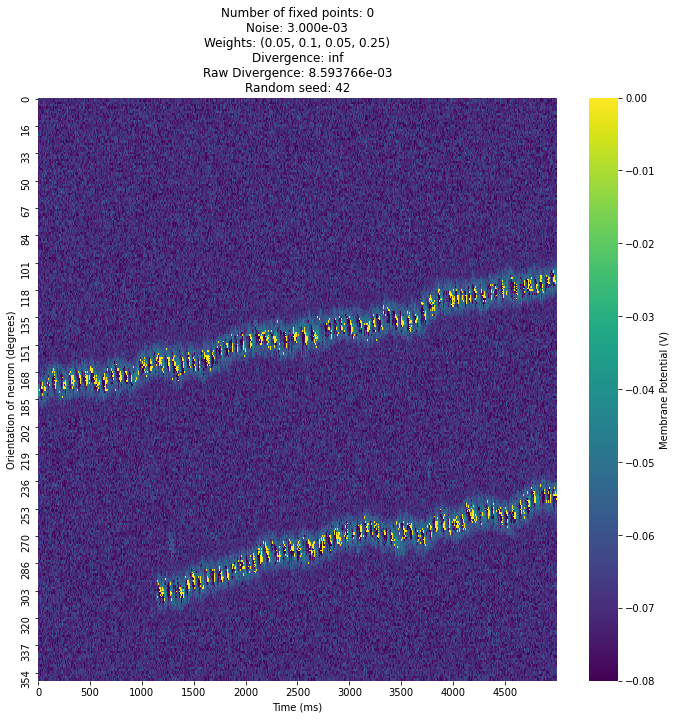

In [9]:
# Let's see the difference between kl divergences when they are calculated on fitted von mises or raw data

ring = RingAttractor(n=256, noise=0, fixed_points_number=0, plot=True, time=5000, random_seed=42)
error_0 = ring.simulate()
ring = RingAttractor(n=256, noise=1e-3, fixed_points_number=0, plot=True, time=5000, random_seed=42)
error_1 = ring.simulate()
ring = RingAttractor(n=256, noise=2e-3, fixed_points_number=0, plot=True, time=5000, random_seed=42)
error_2 = ring.simulate()
ring = RingAttractor(n=256, noise=3e-3, fixed_points_number=0, plot=True, time=5000, random_seed=42)
error_2 = ring.simulate()

### 5. Fixes

    a. At this point we can expand the range of noises, expecting to observe the same behaviours also from n_fp = 4 and maybe lower values too, but the activity could explode before that
    
    b. We need to discuss if we want to elaborate that
    
    c. Calculating kl divergence from the raw data looks a promising approach from the 4 simulations above: the values are very sensible to changes in shape of the distribution. I'll be making more simulations to be statistically sure of which measure is better in a bonus notebook.

### 6. Repeat

We'll repeat on a wider range of np.linspace(0, 2.5e-3, 250), calculating the divergence only on raw data if the next notebook gives positive results.
